In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os

In [3]:
os.chdir('../../')

In [4]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

from vt_backdoor import constants
from vt_backdoor import common_utils
from vt_backdoor import plotting_utils

In [5]:
palette1 = sns.color_palette(['#3B82CE', '#FFCC01', '#F2811D', '#DA4228', '#3BB3A9'])
# palette2 = sns.color_palette(['#43a047'])
palette2 = sns.color_palette(['#ec407a'])

## Data

In [6]:
dataset = 'drebin'
# dataset = 'ogcontagio'
# dataset = 'ember'

train_size = constants.train_sizes[dataset]

In [7]:
csv_file = 'results/drebin__linearsvm__combined_additive_shap__combined_additive_shap__feasible__s1s2/drebin__linearsvm__combined_additive_shap__combined_additive_shap__feasible__summary_df.csv'
# csv_file = 'results/ogcontagio__pdfrf__combined_shap__combined_shap__feasible/ogcontagio__pdfrf__combined_shap__combined_shap__feasible__summary_df.csv'
# csv_file = 'results/ember__lightgbm__fixed__fixed__feasible/ember__lightgbm__fixed__fixed__feasible__summary_df.csv'

In [8]:
to_plot_df = pd.read_csv(csv_file)
del to_plot_df['Unnamed: 0']

In [9]:
to_plot_df

orig_model_orig_test_set_accuracy  orig_model_mw_test_set_accuracy  \
0                               100.0                        99.115566   
1                               100.0                        99.115566   
2                               100.0                        99.115566   
3                               100.0                        99.115566   
4                               100.0                        99.115566   
5                               100.0                        99.115566   
6                               100.0                        99.115566   
7                               100.0                        99.115566   
8                               100.0                        99.115566   
9                               100.0                        99.115566   
10                              100.0                        99.115566   
11                              100.0                        99.115566   
12                              100.0                        99.115566   
13                              100.0                        99.115566   
14                              100.0                        99.115566   
15                              100.0                        99.115566   
16                              100.0                        99.115566   
17                              100.0                        99.115566   
18                              100.0                        99.115566   
19                              100.0                        99.115566   
20                              100.0                        99.115566   
21                              100.0                        99.115566   
22                              100.0                        99.115566   
23                              100.0                        99.115566   
24                              100.0                        99.115566   
25                              100.0                        99.115566   
26                              100.0                        99.115566   
27                              100.0                        99.115566   
28                              100.0                        99.115566   
29                              100.0                        99.115566   
30                              100.0                        99.115566   
31                              100.0                        99.115566   
32                              100.0                        99.115566   
33                              100.0                        99.115566   
34                              100.0                        99.115566   
35                              100.0                        99.115566   
36                              100.0                        99.115566   
37                              100.0                        99.115566   
38                              100.0                        99.115566   
39                              100.0                        99.115566   
40                              100.0                        99.115566   
41                              100.0                        99.115566   
42                              100.0                        99.115566   
43                              100.0                        99.115566   
44                              100.0                        99.115566   
45                              100.0                        99.115566   
46                              100.0                        99.115566   
47                              100.0                        99.115566   
48                              100.0                        99.115566   
49                              100.0                        99.115566   

    orig_model_gw_train_set_accuracy  orig_model_wmgw_train_set_accuracy  \
0                          99.950171                          100.000000   
1                          99.950171                           99.768519   
2

In [10]:
# common_utils.recover_accuracy(to_plot_df)

In [11]:
# to_plot_df

In [12]:
# temp = to_plot_df.groupby('num_gw_to_watermark').mean()
# print((temp['orig_model_orig_test_set_rec_accuracy'] - temp['new_model_orig_test_set_rec_accuracy']) * 100)
# print()
# print((temp['new_model_orig_test_set_rec_accuracy']) * 100)
# print()
# print((100 - temp['new_model_mw_test_set_accuracy']))

In [13]:
plot_cols = [constants.human_mapping.get(i, i) for i in to_plot_df.columns]
to_plot_df.columns = plot_cols

In [14]:
to_plot_df['Poison percentage'] = ['{:.1f}%'.format(s * 100 / train_size) for s in to_plot_df['Poison percentage']]
# For ogcontagio
# to_plot_df['Poison percentage'] = ['{:.1f}%'.format(s * 100 / train_size) for s in to_plot_df['Poison pool size']]

In [15]:
to_plot_df

Original model accuracy on selected malicious samples  \
0                                               100.0       
1                                               100.0       
2                                               100.0       
3                                               100.0       
4                                               100.0       
5                                               100.0       
6                                               100.0       
7                                               100.0       
8                                               100.0       
9                                               100.0       
10                                              100.0       
11                                              100.0       
12                                              100.0       
13                                              100.0       
14                                              100.0       
15                                              100.0       
16                                              100.0       
17                                              100.0       
18                                              100.0       
19                                              100.0       
20                                              100.0       
21                                              100.0       
22                                              100.0       
23                                              100.0       
24                                              100.0       
25                                              100.0       
26                                              100.0       
27                                              100.0       
28                                              100.0       
29                                              100.0       
30                                              100.0       
31                                              100.0       
32                                              100.0       
33                                              100.0       
34                                              100.0       
35                                              100.0       
36                                              100.0       
37                                              100.0       
38                                              100.0       
39                                              100.0       
40                                              100.0       
41                                              100.0       
42                                              100.0       
43                                              100.0       
44                                              100.0       
45                                              100.0       
46                                              100.0       
47                                              100.0       
48                                              100.0       
49                                              100.0       

    orig_model_mw_test_set_accuracy  orig_model_gw_train_set_accuracy  \
0                         99.115566                         99.950171   
1                         99.115566                         99.950171   
2                         99.115566                         99.950171   
3                         99.115566                         99.950171   
4                         99.115566                         99.951386   
5                         99.115566                         99.950171   
6                         99.115566                         99.951386   
7                         99.115566                         99.950171   
8                         99.115566                         99.950171   
9                         99.115566                         99.950171   
10                        99.115566                         99.949908   
11              

In [16]:
# Only for drebin
to_plot_df = to_plot_df[to_plot_df['Poison percentage'] != '6.0%']

In [17]:
# Only for ogcontagio
# to_plot_df[constants.human_mapping['new_model_mw_test_set_accuracy']] = to_plot_df[constants.human_mapping['new_model_mw_test_set_accuracy']] * 100
# to_plot_df[constants.human_mapping['orig_model_orig_test_set_accuracy']] = to_plot_df[constants.human_mapping['orig_model_orig_test_set_accuracy']] * 100

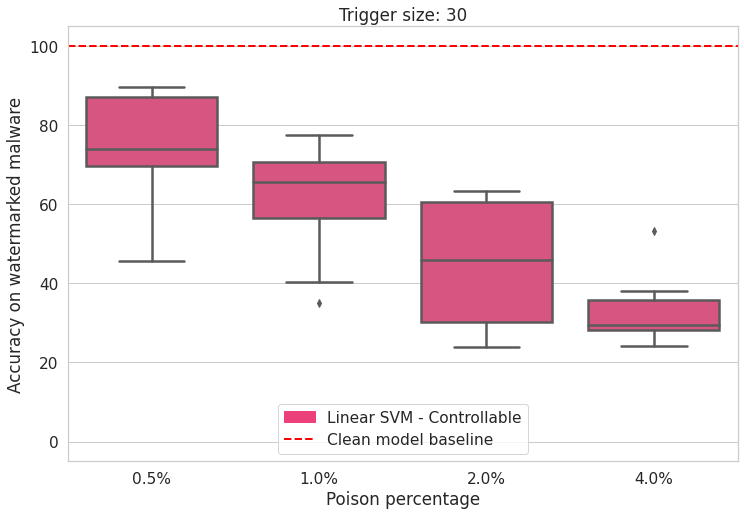

In [20]:
fig = plt.figure(figsize=(12, 8))
sns.set(style='whitegrid', font_scale=1.4)

x_col = constants.human_mapping['num_gw_to_watermark']
y_col = constants.human_mapping['new_model_mw_test_set_accuracy']
hue_col = constants.human_mapping['num_watermark_features']

# plt.figure(figsize=(10, 5))

bplt = sns.boxplot(
    x=x_col,
    y=y_col,
    hue=hue_col,
    data=to_plot_df,
    palette=palette2,
    hue_order=sorted(set(to_plot_df[hue_col].to_list())),
    dodge=True,
    linewidth=2.5
)
bplt.set(title='Trigger size: 30')

axes = bplt.axes
axes.set_ylim(-5, 105)

hline = constants.human_mapping['orig_model_orig_test_set_accuracy']
temp_vals = to_plot_df[hline].to_numpy()
assert np.all(temp_vals == temp_vals[0])
hline = temp_vals[0]
hl1 = axes.axhline(hline, ls='--', color='red', linewidth=2, label='Clean model baseline')


# hline = 'orig_model_mw_test_set_accuracy'
# temp_vals = to_plot_df[hline].to_numpy()
# assert np.all(temp_vals == temp_vals[0])
# hline = temp_vals[0]
# hl2 = axes.axhline(hline, ls='--', color='orange', linewidth=2, label='Clean model on backdoored malware')

label_drebin = 'Linear SVM - Controllable'
label_ogcontagio = 'Random Forest - Controllable'

# base_patch = mpatches.Patch(color=palette2[0], label='{}: {}'.format(hue_col, to_plot_df[hue_col][0]))
base_patch = mpatches.Patch(color=palette2[0], label=label_drebin)

# plt.legend(handles=[base_patch, hl1, hl2])
plt.legend(handles=[base_patch, hl1], loc='lower center')
# plt.legend(handles=[base_patch, hl1],  loc='center right')